<a href="https://colab.research.google.com/github/tccoleman26/zartico_things/blob/main/Path_Segment_Simplification_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#!apt-get install -qq curl g++ make subversion
##!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
#!svn checkout https://github.com/jbremz/Beijing-Trajectories-Project/tree/trunk/

#os.chdir('spatialindex-src-1.8.5')
#!./configure
##!make
#!make install
#!pip install rtree
#!ldconfig

In [29]:
!pip install scikit-mobility
! python -m pip install git+https://github.com/anitagraser/movingpandas
!pip install stonesoup

  Cloning https://github.com/anitagraser/movingpandas to /tmp/pip-req-build-qho4zll3
  Running command git clone -q https://github.com/anitagraser/movingpandas /tmp/pip-req-build-qho4zll3


In [30]:
# General Use
import datetime
import zipfile
import random
import os

# Plotting
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


# Computational
from numpy import arctan2, random, sin, cos, degrees
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
from scipy.stats import zscore
from math import radians, pi, ceil
import pandas as pd
import numpy as np
from random import gauss

# Model Selection

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# GeoSpatial
import skmob # This is not a plotting Package, but I really like the visualization
import shapely
from shapely.geometry import Point, LineString
from movingpandas import Trajectory, KalmanSmootherCV


#drive.mount('/content/drive', force_remount=True)


In [31]:
def get_geolife_files():
    files = ['Example Data/052/Trajectory/Labelled/20080520122500.csv', 'Example Data/052/Trajectory/Labelled/20080520094035.csv', 'Example Data/052/Trajectory/Labelled/20080521123501.csv', 'Example Data/052/Trajectory/Labelled/20080521072601.csv', 'Example Data/052/Trajectory/Labelled/20080523044542.csv', 'Example Data/052/Trajectory/Labelled/20080520141620.csv', 'Example Data/052/Trajectory/Labelled/20080520121510.csv', 'Example Data/052/Trajectory/Labelled/20080521101353.csv', 'Example Data/052/Trajectory/Labelled/20080521121543.csv', 'Example Data/052/Trajectory/Labelled/20080522100008.csv', 'Example Data/052/Trajectory/Labelled/20080521135027.csv', 'Example Data/052/Trajectory/Labelled/20080521033532.csv', 'Example Data/052/Trajectory/Labelled/20080523064456.csv', 'Example Data/052/Trajectory/Labelled/20080521032516.csv', 'Example Data/052/Trajectory/Labelled/20080523051016.csv', 'Example Data/052/Trajectory/Labelled/20080525053129.csv', 'Example Data/052/Trajectory/Labelled/20080522091050.csv', 'Example Data/052/Trajectory/Labelled/20080525093457.csv', 'Example Data/052/Trajectory/Labelled/20080525125901.csv', 'Example Data/052/Trajectory/Labelled/20080521123803.csv', 'Example Data/052/Trajectory/Labelled/20080521103601.csv', 'Example Data/052/Trajectory/Labelled/20080526124007.csv', 'Example Data/052/Trajectory/Labelled/20080527085723.csv', 'Example Data/052/Trajectory/Labelled/20080529064353.csv', 'Example Data/052/Trajectory/Labelled/20080528113420.csv', 'Example Data/052/Trajectory/Labelled/20080528095006.csv', 'Example Data/052/Trajectory/Labelled/20080528092335.csv', 'Example Data/052/Trajectory/Labelled/20080522090054.csv', 'Example Data/052/Trajectory/Labelled/20080525164457.csv', 'Example Data/052/Trajectory/Labelled/20080525112839.csv', 'Example Data/052/Trajectory/Labelled/20080525090257.csv', 'Example Data/052/Trajectory/Labelled/20080529073001.csv', 'Example Data/052/Trajectory/Labelled/20080529065241.csv', 'Example Data/052/Trajectory/Labelled/20080530100805.csv', 'Example Data/052/Trajectory/Labelled/20080525105149.csv', 'Example Data/052/Trajectory/Labelled/20080531071234.csv', 'Example Data/052/Trajectory/Labelled/20080531110116.csv', 'Example Data/052/Trajectory/Labelled/20080527101527.csv', 'Example Data/052/Trajectory/Labelled/20080531035848.csv', 'Example Data/052/Trajectory/Labelled/20080602034606.csv', 'Example Data/052/Trajectory/Labelled/20080601094724.csv', 'Example Data/052/Trajectory/Labelled/20080525054105.csv', 'Example Data/052/Trajectory/Labelled/20080527074452.csv', 'Example Data/052/Trajectory/Labelled/20080601133352.csv', 'Example Data/052/Trajectory/Labelled/20080531100404.csv', 'Example Data/052/Trajectory/Labelled/20080602061818.csv', 'Example Data/052/Trajectory/Labelled/20080602040644.csv', 'Example Data/052/Trajectory/Labelled/20080528114522.csv', 'Example Data/052/Trajectory/Labelled/20080603092527.csv', 'Example Data/052/Trajectory/Labelled/20080603035158.csv', 'Example Data/052/Trajectory/Labelled/20080603130343.csv', 'Example Data/052/Trajectory/Labelled/20080603002235.csv', 'Example Data/052/Trajectory/Labelled/20080530101103.csv', 'Example Data/052/Trajectory/Labelled/20080603134625.csv', 'Example Data/052/Trajectory/Labelled/20080606035050.csv', 'Example Data/052/Trajectory/Labelled/20080606084938.csv', 'Example Data/052/Trajectory/Labelled/20080531034238.csv', 'Example Data/052/Trajectory/Labelled/20080606131532.csv', 'Example Data/052/Trajectory/Labelled/20080607110443.csv', 'Example Data/052/Trajectory/Labelled/20080607093313.csv', 'Example Data/052/Trajectory/Labelled/20080607114953.csv', 'Example Data/052/Trajectory/Labelled/20080531103800.csv', 'Example Data/052/Trajectory/Labelled/20080531125826.csv', 'Example Data/052/Trajectory/Labelled/20080605084023.csv', 'Example Data/052/Trajectory/Labelled/20080609034805.csv', 'Example Data/052/Trajectory/Labelled/20080606091550.csv', 'Example Data/052/Trajectory/Labelled/20080531092900.csv', 'Example Data/052/Trajectory/Labelled/20080604121559.csv', 'Example Data/052/Trajectory/Labelled/20080609074631.csv', 'Example Data/052/Trajectory/Labelled/20080607124455.csv', 'Example Data/052/Trajectory/Labelled/20080609092059.csv', 'Example Data/052/Trajectory/Labelled/20080609103659.csv', 'Example Data/052/Trajectory/Labelled/20080612085237.csv', 'Example Data/052/Trajectory/Labelled/20080610111332.csv', 'Example Data/052/Trajectory/Labelled/20080612041404.csv', 'Example Data/052/Trajectory/Labelled/20080609122745.csv', 'Example Data/052/Trajectory/Labelled/20080610113000.csv', 'Example Data/052/Trajectory/Labelled/20080612222001.csv', 'Example Data/052/Trajectory/Labelled/20080613051431.csv', 'Example Data/052/Trajectory/Labelled/20080614085905.csv', 'Example Data/052/Trajectory/Labelled/20080615065036.csv', 'Example Data/052/Trajectory/Labelled/20080614130257.csv', 'Example Data/052/Trajectory/Labelled/20080615142801.csv', 'Example Data/052/Trajectory/Labelled/20080609100849.csv', 'Example Data/052/Trajectory/Labelled/20080616050730.csv', 'Example Data/052/Trajectory/Labelled/20080613015306.csv', 'Example Data/052/Trajectory/Labelled/20080616065908.csv', 'Example Data/052/Trajectory/Labelled/20080610133012.csv', 'Example Data/052/Trajectory/Labelled/20080617042723.csv', 'Example Data/052/Trajectory/Labelled/20080620014602.csv', 'Example Data/052/Trajectory/Labelled/20080617072308.csv', 'Example Data/052/Trajectory/Labelled/20080620013137.csv', 'Example Data/052/Trajectory/Labelled/20080615071001.csv', 'Example Data/052/Trajectory/Labelled/20080616051910.csv', 'Example Data/052/Trajectory/Labelled/20080620041607.csv', 'Example Data/052/Trajectory/Labelled/20080621101507.csv', 'Example Data/052/Trajectory/Labelled/20080621013806.csv', 'Example Data/052/Trajectory/Labelled/20080620100636.csv', 'Example Data/052/Trajectory/Labelled/20080621124503.csv', 'Example Data/052/Trajectory/Labelled/20080620021022.csv', 'Example Data/052/Trajectory/Labelled/20080621160803.csv', 'Example Data/052/Trajectory/Labelled/20080625063822.csv', 'Example Data/052/Trajectory/Labelled/20080620103926.csv', 'Example Data/052/Trajectory/Labelled/20080625052637.csv', 'Example Data/052/Trajectory/Labelled/20080625053847.csv', 'Example Data/052/Trajectory/Labelled/20080625064812.csv', 'Example Data/052/Trajectory/Labelled/20080625124823.csv', 'Example Data/052/Trajectory/Labelled/20080626204306.csv', 'Example Data/052/Trajectory/Labelled/20080626205641.csv', 'Example Data/052/Trajectory/Labelled/20080626222331.csv', 'Example Data/052/Trajectory/Labelled/20080620111241.csv', 'Example Data/052/Trajectory/Labelled/20080626234501.csv', 'Example Data/052/Trajectory/Labelled/20080627015826.csv', 'Example Data/052/Trajectory/Labelled/20080627030836.csv', 'Example Data/052/Trajectory/Labelled/20080627033641.csv', 'Example Data/052/Trajectory/Labelled/20080628232655.csv', 'Example Data/052/Trajectory/Labelled/20080629022249.csv', 'Example Data/052/Trajectory/Labelled/20080629042317.csv', 'Example Data/052/Trajectory/Labelled/20080620043647.csv', 'Example Data/052/Trajectory/Labelled/20080629090257.csv', 'Example Data/052/Trajectory/Labelled/20080629091017.csv', 'Example Data/052/Trajectory/Labelled/20080702094938.csv', 'Example Data/052/Trajectory/Labelled/20080629083757.csv', 'Example Data/052/Trajectory/Labelled/20080703063902.csv', 'Example Data/052/Trajectory/Labelled/20080703114557.csv', 'Example Data/052/Trajectory/Labelled/20080703150207.csv', 'Example Data/052/Trajectory/Labelled/20080629061612.csv', 'Example Data/052/Trajectory/Labelled/20080706090206.csv', 'Example Data/052/Trajectory/Labelled/20080706091651.csv', 'Example Data/052/Trajectory/Labelled/20080706093531.csv', 'Example Data/052/Trajectory/Labelled/20080706110356.csv', 'Example Data/052/Trajectory/Labelled/20080706111941.csv', 'Example Data/052/Trajectory/Labelled/20080707064053.csv', 'Example Data/052/Trajectory/Labelled/20080629064217.csv', 'Example Data/052/Trajectory/Labelled/20080626213001.csv', 'Example Data/052/Trajectory/Labelled/20080708125325.csv', 'Example Data/052/Trajectory/Labelled/20080709020511.csv', 'Example Data/052/Trajectory/Labelled/20080701091144.csv', 'Example Data/052/Trajectory/Labelled/20080709023701.csv', 'Example Data/052/Trajectory/Labelled/20080629054852.csv', 'Example Data/052/Trajectory/Labelled/20080702100023.csv', 'Example Data/052/Trajectory/Labelled/20080709095902.csv', 'Example Data/052/Trajectory/Labelled/20080628235945.csv', 'Example Data/052/Trajectory/Labelled/20080709035556.csv', 'Example Data/052/Trajectory/Labelled/20080702123713.csv', 'Example Data/052/Trajectory/Labelled/20080709154407.csv', 'Example Data/052/Trajectory/Labelled/20080709130937.csv', 'Example Data/052/Trajectory/Labelled/20080709100807.csv', 'Example Data/052/Trajectory/Labelled/20080709143247.csv', 'Example Data/052/Trajectory/Labelled/20080709042706.csv', 'Example Data/052/Trajectory/Labelled/20080709212205.csv', 'Example Data/052/Trajectory/Labelled/20080709185447.csv', 'Example Data/052/Trajectory/Labelled/20080709215435.csv', 'Example Data/052/Trajectory/Labelled/20080709220540.csv', 'Example Data/052/Trajectory/Labelled/20080709235850.csv', 'Example Data/052/Trajectory/Labelled/20080709232155.csv', 'Example Data/052/Trajectory/Labelled/20080710091108.csv', 'Example Data/052/Trajectory/Labelled/20080709231635.csv', 'Example Data/052/Trajectory/Labelled/20080711021006.csv', 'Example Data/052/Trajectory/Labelled/20080711015836.csv', 'Example Data/052/Trajectory/Labelled/20080711041551.csv', 'Example Data/052/Trajectory/Labelled/20080711023601.csv', 'Example Data/052/Trajectory/Labelled/20080711044111.csv', 'Example Data/052/Trajectory/Labelled/20080711051401.csv', 'Example Data/052/Trajectory/Labelled/20080711063551.csv', 'Example Data/052/Trajectory/Labelled/20080711102911.csv', 'Example Data/052/Trajectory/Labelled/20080711104216.csv', 'Example Data/052/Trajectory/Labelled/20080703064907.csv', 'Example Data/052/Trajectory/Labelled/20080710093913.csv', 'Example Data/052/Trajectory/Labelled/20080711070521.csv', 'Example Data/052/Trajectory/Labelled/20080711093901.csv', 'Example Data/052/Trajectory/Labelled/20080709212835.csv', 'Example Data/052/Trajectory/Labelled/20080716083551.csv', 'Example Data/052/Trajectory/Labelled/20080717032214.csv', 'Example Data/052/Trajectory/Labelled/20080715104708.csv', 'Example Data/052/Trajectory/Labelled/20080717015934.csv', 'Example Data/052/Trajectory/Labelled/20080717083531.csv', 'Example Data/052/Trajectory/Labelled/20080717093456.csv', 'Example Data/052/Trajectory/Labelled/20080711132356.csv', 'Example Data/052/Trajectory/Labelled/20080717011859.csv', 'Example Data/052/Trajectory/Labelled/20080717121106.csv', 'Example Data/052/Trajectory/Labelled/20080710133933.csv', 'Example Data/052/Trajectory/Labelled/20080717100356.csv', 'Example Data/052/Trajectory/Labelled/20080718045225.csv', 'Example Data/052/Trajectory/Labelled/20080719044536.csv', 'Example Data/052/Trajectory/Labelled/20080718052050.csv', 'Example Data/052/Trajectory/Labelled/20080719053451.csv', 'Example Data/052/Trajectory/Labelled/20080719055241.csv', 'Example Data/052/Trajectory/Labelled/20080718060025.csv', 'Example Data/052/Trajectory/Labelled/20080719093121.csv', 'Example Data/052/Trajectory/Labelled/20080711105531.csv', 'Example Data/052/Trajectory/Labelled/20080719162501.csv', 'Example Data/052/Trajectory/Labelled/20080720055433.csv', 'Example Data/052/Trajectory/Labelled/20080720093628.csv', 'Example Data/052/Trajectory/Labelled/20080720074038.csv', 'Example Data/052/Trajectory/Labelled/20080717073456.csv', 'Example Data/052/Trajectory/Labelled/20080720090358.csv', 'Example Data/052/Trajectory/Labelled/20080720094213.csv', 'Example Data/052/Trajectory/Labelled/20080720044908.csv', 'Example Data/052/Trajectory/Labelled/20080721041611.csv', 'Example Data/052/Trajectory/Labelled/20080720100653.csv', 'Example Data/052/Trajectory/Labelled/20080721045651.csv', 'Example Data/052/Trajectory/Labelled/20080721071636.csv', 'Example Data/052/Trajectory/Labelled/20080721123216.csv', 'Example Data/052/Trajectory/Labelled/20080721093941.csv', 'Example Data/052/Trajectory/Labelled/20080722041604.csv', 'Example Data/052/Trajectory/Labelled/20080719052941.csv', 'Example Data/052/Trajectory/Labelled/20080722045349.csv', 'Example Data/052/Trajectory/Labelled/20080722073939.csv', 'Example Data/052/Trajectory/Labelled/20080722075859.csv', 'Example Data/052/Trajectory/Labelled/20080721074941.csv', 'Example Data/052/Trajectory/Labelled/20080722091929.csv', 'Example Data/052/Trajectory/Labelled/20080722085604.csv', 'Example Data/052/Trajectory/Labelled/20080723120252.csv', 'Example Data/052/Trajectory/Labelled/20080723122637.csv', 'Example Data/052/Trajectory/Labelled/20080724021720.csv', 'Example Data/052/Trajectory/Labelled/20080724050145.csv', 'Example Data/052/Trajectory/Labelled/20080724064210.csv', 'Example Data/052/Trajectory/Labelled/20080724050915.csv', 'Example Data/052/Trajectory/Labelled/20080724062855.csv', 'Example Data/052/Trajectory/Labelled/20080723102412.csv', 'Example Data/052/Trajectory/Labelled/20080725002826.csv', 'Example Data/052/Trajectory/Labelled/20080724013535.csv', 'Example Data/052/Trajectory/Labelled/20080725072754.csv', 'Example Data/052/Trajectory/Labelled/20080725012931.csv', 'Example Data/052/Trajectory/Labelled/20080725071224.csv', 'Example Data/052/Trajectory/Labelled/20080723082932.csv', 'Example Data/052/Trajectory/Labelled/20080727033556.csv', 'Example Data/052/Trajectory/Labelled/20080726091506.csv', 'Example Data/052/Trajectory/Labelled/20080727040606.csv', 'Example Data/052/Trajectory/Labelled/20080726122906.csv', 'Example Data/052/Trajectory/Labelled/20080725080444.csv', 'Example Data/052/Trajectory/Labelled/20080726083936.csv', 'Example Data/052/Trajectory/Labelled/20080727092302.csv', 'Example Data/052/Trajectory/Labelled/20080727165404.csv', 'Example Data/052/Trajectory/Labelled/20080729111821.csv', 'Example Data/052/Trajectory/Labelled/20080729131811.csv', 'Example Data/052/Trajectory/Labelled/20080730092319.csv', 'Example Data/052/Trajectory/Labelled/20080730095229.csv', 'Example Data/052/Trajectory/Labelled/20080727112624.csv', 'Example Data/052/Trajectory/Labelled/20080730120344.csv', 'Example Data/052/Trajectory/Labelled/20080729104926.csv', 'Example Data/052/Trajectory/Labelled/20080730132704.csv', 'Example Data/052/Trajectory/Labelled/20080730120929.csv', 'Example Data/052/Trajectory/Labelled/20080730135539.csv', 'Example Data/052/Trajectory/Labelled/20080731001522.csv', 'Example Data/052/Trajectory/Labelled/20080731035307.csv', 'Example Data/052/Trajectory/Labelled/20080731073512.csv', 'Example Data/052/Trajectory/Labelled/20080725082034.csv', 'Example Data/052/Trajectory/Labelled/20080822094932.csv', 'Example Data/052/Trajectory/Labelled/20080818112052.csv', 'Example Data/052/Trajectory/Labelled/20080822091106.csv', 'Example Data/052/Trajectory/Labelled/20080902072351.csv', 'Example Data/052/Trajectory/Labelled/20080902075058.csv', 'Example Data/052/Trajectory/Labelled/20081002125022.csv', 'Example Data/052/Trajectory/Labelled/20081002105157.csv', 'Example Data/052/Trajectory/Labelled/20080902055635.csv', 'Example Data/052/Trajectory/Labelled/20081002143402.csv', 'Example Data/052/Trajectory/Labelled/20081003042435.csv', 'Example Data/052/Trajectory/Labelled/20081003044725.csv', 'Example Data/052/Trajectory/Labelled/20081003065815.csv', 'Example Data/052/Trajectory/Labelled/20081001224837.csv', 'Example Data/052/Trajectory/Labelled/20081002133447.csv', 'Example Data/052/Trajectory/Labelled/20081005101320.csv', 'Example Data/052/Trajectory/Labelled/20081006135632.csv', 'Example Data/052/Trajectory/Labelled/20080729125201.csv', 'Example Data/052/Trajectory/Labelled/20081006032437.csv', 'Example Data/052/Trajectory/Labelled/20081007001045.csv', 'Example Data/052/Trajectory/Labelled/20081007002200.csv', 'Example Data/052/Trajectory/Labelled/20081007000310.csv', 'Example Data/052/Trajectory/Labelled/20081007020218.csv', 'Example Data/052/Trajectory/Labelled/20081005135127.csv', 'Example Data/052/Trajectory/Labelled/20081007021543.csv', 'Example Data/052/Trajectory/Labelled/20080731022432.csv', 'Example Data/052/Trajectory/Labelled/20081007023048.csv', 'Example Data/052/Trajectory/Labelled/20081008035138.csv', 'Example Data/052/Trajectory/Labelled/20081007111938.csv', 'Example Data/052/Trajectory/Labelled/20081005094923.csv', 'Example Data/052/Trajectory/Labelled/20081002062627.csv', 'Example Data/052/Trajectory/Labelled/20081010011727.csv', 'Example Data/052/Trajectory/Labelled/20081010045331.csv', 'Example Data/052/Trajectory/Labelled/20081008041438.csv', 'Example Data/052/Trajectory/Labelled/20081010130637.csv', 'Example Data/052/Trajectory/Labelled/20081010120707.csv', 'Example Data/052/Trajectory/Labelled/20081010013057.csv', 'Example Data/052/Trajectory/Labelled/20081008063829.csv']

    base = 'https://raw.githubusercontent.com/jbremz/Beijing-Trajectories-Project/master/Example%20Data/052/Trajectory/Labelled/'

    file_list = [base + f.rsplit('/',1)[1] for f in files]
    return file_list

def get_df(ts_list, pt_list, noise=False):
    """
    Args:
       ts_list (int): A list of timestamps 
       pt_list (tuple): 

    Returns:
        pd.DataFrame
    """
    df = pd.DataFrame({'time(s)': ts_list, 'start_point':pt_list})
    df['end_point'] = df['start_point'].shift(-1)
    df = df_turn_points_to_columns(df, 'start_point', 'end_point')  
    df = df.dropna()
    df['bearings']  = df.apply(lambda x: bearings(x['start_point_x'], x['start_point_y'], x['end_point_x'], x['end_point_y']),axis=1)
    df['distance'] = df.apply(lambda x: distance.euclidean(x['start_point'], x['end_point']), axis=1) 
    df['velocity'] = df['distance'] / 3
    if noise:
        noise_cols = [col + "_noise" for col in df.columns]
        noise_cols[0] = 'time(s)'
        df.columns = noise_cols

    return df

def get_bearing_velocity_distance_simp_df(simp_pdf):
    """
    Yeah... this is a fucking mess
    """
    simp_pdf['ground_truth_x']= simp_pdf['simplified_x']#.to_list()
    simp_pdf['ground_truth_y']= simp_pdf['simplified_x']#
    simp_pdf['time(s)'] = [i*3 for i in range(len(simp_pdf['ground_truth_x']))]
    simp_pdf['start_point_gt'] = simp_pdf.apply(lambda x: (x['ground_truth_x'], x['ground_truth_y']),axis=1)
    simp_pdf['end_point_gt'] = simp_pdf['start_point_gt'].shift(-1).reset_index(drop=True)
    simp_pdf['ground_truth_x']= simp_pdf['simplified_x']#.to_list()
    simp_pdf['ground_truth_y']= simp_pdf['simplified_x']#
    simp_pdf['time(s)'] = [i*3 for i in range(len(simp_pdf['ground_truth_x']))]
    simp_pdf['start_point_gt'] = simp_pdf.apply(lambda x: (x['ground_truth_x'], x['ground_truth_y']),axis=1)
    simp_pdf['end_simplified_x'] = simp_pdf['simplified_x'].shift(-1)#.reset_index(drop=True)
    simp_pdf['end_simplified_y'] = simp_pdf['simplified_y'].shift(-1)#.reset_index(drop=True)
    simp_pdf['end_simplified_points'] = simp_pdf['simplified_points'].shift(-1)#.reset_index(drop=True)
    simp_pdf = simp_pdf.reset_index(drop=True).dropna()
    
    simp_pdf['bearings_simp']  = simp_pdf.apply(lambda x: bearings(x['simplified_x'], x['simplified_y'], x['end_simplified_x'], x['end_simplified_y']),axis=1)
    simp_pdf['distance_simp'] = simp_pdf.apply(lambda x: distance.euclidean(x['simplified_points'], x['end_simplified_points']), axis=1)

    simp_pdf['velocity_simp'] = simp_pdf['distance_simp'] / 3

    simp_pdf['dist_gt'] = simp_pdf.apply(lambda x: distance.euclidean(x['start_point_gt'], x['end_point_gt']), axis=1) 
    simp_pdf['bearing_gt'] = 45
    simp_pdf['velocity_gt'] = 0.471405 # THis is not quite true but close enough

    return simp_pdf


def merge_df_noisy_df(ground_truth_df, noisy_df):
    df = pd.concat([ground_truth_df, noisy_df],axis=1)
    return df.iloc[:, 1:]


def df_turn_points_to_columns(df, start_point_column, end_point_columns):

    df[[start_point_column + "_x",start_point_column +"_y"]] = df[start_point_column].apply(pd.Series)
    df[[end_point_columns +"_x",end_point_columns +"_y"]] = df[end_point_columns].apply(pd.Series)
    return df

  
def bearings(lon_1,lat_1,lon_2,lat_2, round_num=True):
    """
    Get bearings between lon_1, lat1_, and lon_2, lat_2
    https://www.movable-type.co.uk/scripts/latlong.html
    """
    lon_1, lat_1, lon_2, lat_2 = radians(lon_1), radians(lat_1), radians(lon_2), radians(lat_2)


    dl = lon_2-lon_1
    x = cos(lat_2)*sin(dl)
    y = cos(lat_1)*sin(lat_2) - sin(lat_1)*cos(lat_2)* cos(dl)
    bearing = arctan2(x,y)
    if round_num:
        return ceil(bearing*180/pi)
    else:
        return bearing*180/pi

def plot_position(df, run_number, number_of_runs):
    
    fig = make_subplots(rows=number_of_runs, cols=1)
    
    
    data = [
        go.Scatter(x=df['start_point_x'], y=df['start_point_y'], mode='markers', name='Ground Truth'),
        go.Scatter(x=df['start_point_x_noise'], y=df['start_point_y_noise'], mode='markers+lines', name = 'Position with Noise')
   ]

    fig = go.Figure(data=data, layout=dict(height=450, width=550))

    fig.update_layout(title_text='Y vs X with Noise Run {0}'.format(run_number), title_x=0.5)
    fig.show()


def rdp_simplify(noisy_df, noisy_point_column='start_point_noise', tolerance=1):
    coordinates = list(LineString(noisy_df[noisy_point_column]).simplify(tolerance).coords)
    df = pd.DataFrame(coordinates, columns=['simplified_x','simplified_y'])
    df['simplified_points'] = df.apply(lambda x: (x['simplified_x'], x['simplified_y']), axis=1)
    return df


def plot_position_gd_df(ground_truth_df, simplified_df, run_number, number_of_runs):
    
    fig = make_subplots(rows=number_of_runs, cols=1)

    data = [
        go.Scatter(x=ground_truth_df['start_point_x'], y=ground_truth_df['start_point_y'], mode='markers', name='Ground Truth'),
        go.Scatter(x=simplified_df['simplified_x'], y=simplified_df['simplified_y'], mode='markers+lines', name = 'Simplified VW Path')
   ]

    fig = go.Figure(data=data, layout=dict(height=450, width=550))

    fig.update_layout(title_text='Simplified Y vs X with Noise Run {0}'.format(run_number), title_x=0.5)
    fig.show()
    
    

# Abstract

# Introduction
---
> This Notebook and (subsequent paper) is about how sensor noise can effect trajectory data, how much that can effect trajectory data, and steps forward on how to remedy that problem.

> For example, if an entity is walking down Rodejo Drive in Beverly hills, we can surmize that the person is walking on the side walk, and not in the middle of the street. However, if the GPS data says the entity is in the middle of the street and moving under 3 Miles per Hour, at a near constant rate, that is probably a person and not a car. And t hat phenomenon is called sensor drift. 

> To study this, we are going to go through this in steps, and this paper is split into sections to describe these steps. The first section investigating how noise effects $y=x$ and how the Ramer Douglas Peucker Algorithm can alieviate some noise. The Second section covering how the RDP can alleviate geospatial trajectory data noise. And the third covering how to use machine learning can reduce noise for every line segment and reduce data at the same time.




# Section 1:  y=x

## Simple Problem
---
We are going to need to a ground truth data in the form of $y=x$ which will represent the lat and the lon of the problem. There will be a constant velocity, as well as a constant bearing to go with it.

In [32]:
ts_list = [i*3 for i in range(30)]
point_list = [(i,i) for i in range(30)]

ground_truth_pdf = get_df(ts_list, point_list, noise =False)
ground_truth_pdf.iloc[0:5] # Only so the dataframe doesn't take up the entire screen


,time(s),start_point,end_point,start_point_x,start_point_y,end_point_x,end_point_y,bearings,distance,velocity
0,0,"(0, 0)","(1, 1)",0,0,1.0,1.0,45,1.414214,0.471405
1,3,"(1, 1)","(2, 2)",1,1,2.0,2.0,45,1.414214,0.471405
2,6,"(2, 2)","(3, 3)",2,2,3.0,3.0,45,1.414214,0.471405
3,9,"(3, 3)","(4, 4)",3,3,4.0,4.0,45,1.414214,0.471405
4,12,"(4, 4)","(5, 5)",4,4,5.0,5.0,45,1.414214,0.471405


In [33]:
fig = px.line(ground_truth_pdf, x="start_point_x", y="start_point_y", title='Y vs X Trajectory',  markers=True)
fig.show()


### Sensor Noise
---
Sensor Noise affects the trajectory by making the Y and X Columns change the trajetory and bearing. For example, if you have intermittent samples taking measurements for footfall data, that can create sensor noise, and create a bad reading if you're trying to evaluate how many people walked by and stopped at a store window. The effect of this is with sensor noise you don't know the true position of what is happening.

Instead of being constants, the secondary analytics (bearing, velocity, and distance) will now change as result. To simulate and demonstrate this, let's assume that the noise is Gaussian with a mean of 0 and a standard deviation of 1. And the point column will be $\vec{P}$. To Demonstrate this we will look at 8 different runs.






#### Definition of Sensor Noise
----
$\vec{P} = \vec{P}_\text{ground_truth} + \mathcal{N}(μ,\,\sigma^{2}) $

Where $\mathcal{N}(0,\,1) $ is a Gaussian Distribution with a μ of 0 and a $\sigma^{2}$ of 1.


In [34]:
noisy_df_list = []
joined_df_list = []
for i in range(8):

    point_list = [(i+gauss(0,1) ,i+gauss(0,1)) for i in range(30)]
    noisy_df = get_df(ts_list, point_list, noise=True)
    noisy_df_list.append(noisy_df)
    joined_df = merge_df_noisy_df(ground_truth_pdf, noisy_df)   
    joined_df_list.append(joined_df)
    plot_position(joined_df, i+1, 8)

### Correlation of the Variables for the Ground Truth

Now, we are going to take a look at the predictive effect of noise of the variables for the ground truth by using the Pearson Correlation Coefficient $r$. The columns of velocity, bearings, and distance have been dropped from the correlation matrix because there is no variance for the ground truth since the value is constant $(x_i = \overline{x})$. 




#### Equations:
 $d\left( p,q\right)   = \sqrt{\sum_{i=1}^n (x_i-y_i)^2}$


 $r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$





#### Some Analysis:

The values that seem to have the highest effect on the columns start_point and end_point (x,y) are a $f(bearings_\text{noise}, distance_\text{noise})$ or $f(bearings_\text{noise}, velocity_\text{noise}, time(s))$. Which makes sense since the position of $P_{i}$ is a the function of distance and bearing $f(bearings, distance)$ or  $f(bearings, velocity, time(s))$ 

The original bearing has a correlection coeffiecient of 0.91 as when compared to the start_point and the end point respectively. But then when looking at the bearing_noisy, that drop towards to the 0.2 range to the 0.3 range approximately.





In [35]:
for i, pdf in enumerate(joined_df_list):
    fig = px.imshow(pdf.corr(), text_auto=True,title='Correlation for Run {0}'.format(i+1))
    fig.show()

### Sensitivity of the Variables Bearing_Noise, Velocity_Noise, and Distance_Noise
---
We will be taking the Standard Deviation and plotting it accross all 7 runs. This will give us an idea of how sensitive each variable is to gaussian noise. Keep in mind that keeping closer to 0 is better. By far the most sensitive to noise is the bearing, so when looking for an algorithm to reduce noise, that will be a key indicator.

In [36]:
bearing_variance_list= []
distance_variance_list = []
velocity_variance_list = []
run_list = []

for i, pdf in enumerate(joined_df_list):
    bearing_variance_list.append(pdf['bearings_noise'].std())
    distance_variance_list.append(pdf['distance_noise'].std())
    velocity_variance_list.append(pdf['velocity_noise'].std())
    run_list.append(i+1)


std_dev_df = pd.DataFrame({'bearing_std':bearing_variance_list,
                       'distance_std':distance_variance_list,
                       'velocity_std': velocity_variance_list
                       })
mean_std_dev = std_dev_df.mean().to_frame().reset_index()
mean_std_dev.columns = ['variable', 'std_deviation_mean']
display(mean_std_dev)



,variable,std_deviation_mean
0,bearing_std,65.258428
1,distance_std,1.115835
2,velocity_std,0.371945


### Mean Squared Error
---
And then using the mse  $d\left( p,q\right) $ to create a baseline for how far the vectors  $\vec{P}_\text{ground_truth}$ $\vec{P}_\text{position_with_noise}$ are from one another. And we will be doing this for both the $P_{x}$ and $P_{y}$, respectively.



#### Equations
---
$\sum_{i=1}^{n}(P_\text{groundtruth}-P_\text{noisy})^2$


### Results
---
What we are looking at is the noise effecting the path, and to reduce the variance for the Bearing for this simple pathway. To do this, we now need to talk about Path Simplification.

In [37]:
mse_list_x= []
mse_list_y = []
run_list = []
for i, pdf in enumerate(joined_df_list):
    mse_list_x.append(mean_squared_error(pdf['start_point_x'], pdf['start_point_x_noise']))
    mse_list_y.append(mean_squared_error(pdf['start_point_y'], pdf['start_point_y_noise']))
    run_list.append(i+1)


mse_df = pd.DataFrame({'run':run_list, 'mse_x':mse_list_x,'mse_y':mse_list_y})
mse_df
    
fig = go.Figure(data=[
    go.Bar(name='Mean Squared Error X', x=mse_df['run'], y=mse_df['mse_x']),
    go.Bar(name='Mean Squared Error Y', x=mse_df['run'], y=mse_df['mse_y'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Mean Squared Error of X and Y')
fig.update_xaxes(title='Run Number')
fig.update_yaxes(title='MSE')

fig.show()

### Directed Hasdorrf Distance
---

The Directed Hasdoorf Distance is the maximum distance of a set to the the nearest point in the other set. And measures how similar the two sets of points are. This seems like a perfect application for it.

$h(a,b) =  \max_{a \in A}\{\min_{b \in B} \{d({a, b})\}\}$

Where $d({a, b}) $ is the euclidean distance


In [38]:
run_list = []
hd_dist = []
for i, pdf in enumerate(joined_df_list):
    u = np.array([*pdf['start_point_noise']])
    v = np.array([*pdf['start_point']])
    hdist = distance.directed_hausdorff(u,v)
    hd_dist.append(hdist)
    run_list.append(i+1)

hd_df = pd.DataFrame({'run':run_list,'hasdorff_distance':hd_dist})
hd_df['hasdorff_distance'] = hd_df['hasdorff_distance'].apply(pd.Series)[[0]]
hd_df

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:456: UserWarning:

you are shuffling a '_memoryviewslice' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.



,run,hasdorff_distance
0,1,2.149469
1,2,2.122569
2,3,3.053570
3,4,2.317006
4,5,2.665120
5,6,1.515504
6,7,2.501312
7,8,2.516491


In [39]:
fig = go.Figure(data=[
    go.Bar(name='Hasdoorf X', x=hd_df['run'], y=hd_df['hasdorff_distance']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Hasdoorf Distance')
fig.update_xaxes(title='Run Number')
fig.update_yaxes(title='Dist')

fig.show()

## Path Simplification with the RDP

Path Simplification reduces sensor noise/drift by removing the unneccesary points by a tolerance value that is set by a user. This allows for the large variance in bearings to be reduced, and to decrease the Mean Squared Error in the dataframe. 

For this problem (and the susequent one) we need to take a look at the Ramer Douglas Peucker. The Ramer Douglas Peucker (RDP) algorithm selects point that are outside the threshold and removing the points that are within. This is done by selecting vertices to keep rather than the vertices to delete.

Where the length of the vertice is determined by the point to line perpendilar distance.

$ (P_{1},P_{2},(x_{0},y_{0}))={\frac {|(x_{2}-x_{1})(y_{1}-y_{0})-(x_{1}-x_{0})(y_{2}-y_{1})|}{\sqrt {(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}}}}$

```

function DouglasPeucker(PointList[], epsilon)
    # Find the point with the maximum distance
    dmax = 0
    index = 0
    end = length(PointList)
    for i = 2 to (end - 1) {
        d = perpendicularDistance(PointList[i], Line(PointList[1], PointList[end])) 
        if (d > dmax) {
            index = i
            dmax = d
        }
    }

    ResultList[] = empty;

    # If max distance is greater than epsilon, recursively simplify
    if (dmax > epsilon) {
        # Recursive call
        recResults1[] = DouglasPeucker(PointList[1...index], epsilon)
        recResults2[] = DouglasPeucker(PointList[index...end], epsilon)

        # Build the result list
        ResultList[] = {recResults1[1...length(recResults1) - 1], recResults2[1...length(recResults2)]}
    } else {
        ResultList[] = {PointList[1], PointList[end]}
    }
    # Return the result
    return ResultList[]
```




## More Documentation:
- https://www.sciencedirect.com/science/article/abs/pii/S0146664X72800170?via%3Dihub
- https://cartography-playground.gitlab.io/playgrounds/douglas-peucker-algorithm/
- https://karthaus.nl/rdp/

In [40]:
foo = noisy_df_list[0]
#display(foo)
ls = list(LineString(foo['start_point_noise']).simplify(1).coords)
pd.DataFrame(ls)

,0,1
0,-1.851646,-0.754527
1,2.367094,0.933164
2,3.092345,4.543377
3,4.527233,4.231124
4,6.552313,7.720348
5,8.368817,5.740197
6,7.159767,10.110747
7,12.380252,12.731845
8,13.364596,11.751838
9,13.633617,14.588326


In [41]:
simplified_df_list = []
for i, noise_pdf in enumerate(noisy_df_list):
    simp_pdf = rdp_simplify(noise_pdf, 'start_point_noise')
    simplified_df_list.append(simp_pdf)
    plot_position_gd_df(ground_truth_pdf, simp_pdf, i+1, len(noisy_df_list))

### Evaluating the Ramer-Douglas-Peucker Algorithm

For the  Ramer-Douglas-Peucker Algorthm we cannot directly do the metrics for evaluating the two lines without doing interpolation of the points on the line $y=x$. This normally cannot be done as easily as this since the dimensions of the vectors have to be equal to compute the Pearson Correlation Coefficients and the Mean Squared Error.



In [42]:
simp_list = []
for i, simp_pdf in enumerate(simplified_df_list):
    spdf  = get_bearing_velocity_distance_simp_df(simp_pdf)
    fig = px.imshow(spdf.corr(), text_auto=True,title='Correlation for Run {0}'.format(i+1))
    fig.show()



### Mean Squared Error

The Mean Squared Error Dropped by 1 (and I am not sure if that is significant or not). 

In [43]:
#mse_list_x= []
mse_list_y = []
run_list = []
for i, pdf in enumerate(simplified_df_list):
    #mse_list_x.append(mean_squared_error(pdf['ground_truth_x'], pdf['simplified_x']))
    mse_list_y.append(mean_squared_error(pdf['ground_truth_y'], pdf['simplified_y']))
    run_list.append(i+1)


mse_df = pd.DataFrame({'run':run_list, 'mse_x':mse_list_x,'mse_y':mse_list_y})
mse_df
    
fig = go.Figure(data=[
    #go.Bar(name='Mean Squared Error X', x=mse_df['run'], y=mse_df['mse_x']),
    go.Bar(name='Mean Squared Error Y', x=mse_df['run'], y=mse_df['mse_y'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Mean Squared Error of X and Y')
fig.update_xaxes(title='Run Number')
fig.update_yaxes(title='MSE')

fig.show()


### Hasdorrf Distance of Simplified DataFrame

In [44]:
simplified_df_list[0]

,simplified_x,simplified_y,simplified_points,ground_truth_x,ground_truth_y,time(s),start_point_gt,end_point_gt,end_simplified_x,end_simplified_y,end_simplified_points
0,-1.851646,-0.754527,"(-1.85164630523735, -0.7545266544753465)",-1.851646,-1.851646,0,"(-1.85164630523735, -1.85164630523735)","(2.367093759893804, 2.367093759893804)",2.367094,0.933164,"(2.367093759893804, 0.9331639305036314)"
1,2.367094,0.933164,"(2.367093759893804, 0.9331639305036314)",2.367094,2.367094,3,"(2.367093759893804, 2.367093759893804)","(3.0923447994992643, 3.0923447994992643)",3.092345,4.543377,"(3.0923447994992643, 4.543377179405142)"
2,3.092345,4.543377,"(3.0923447994992643, 4.543377179405142)",3.092345,3.092345,6,"(3.0923447994992643, 3.0923447994992643)","(4.5272326211581735, 4.5272326211581735)",4.527233,4.231124,"(4.5272326211581735, 4.2311236213150165)"
3,4.527233,4.231124,"(4.5272326211581735, 4.2311236213150165)",4.527233,4.527233,9,"(4.5272326211581735, 4.5272326211581735)","(6.552313034626281, 6.552313034626281)",6.552313,7.720348,"(6.552313034626281, 7.720348378862795)"
4,6.552313,7.720348,"(6.552313034626281, 7.720348378862795)",6.552313,6.552313,12,"(6.552313034626281, 6.552313034626281)","(8.36881701777395, 8.36881701777395)",8.368817,5.740197,"(8.36881701777395, 5.740197345288755)"
5,8.368817,5.740197,"(8.36881701777395, 5.740197345288755)",8.368817,8.368817,15,"(8.36881701777395, 8.36881701777395)","(7.159766596292814, 7.159766596292814)",7.159767,10.110747,"(7.159766596292814, 10.110746721933559)"
6,7.159767,10.110747,"(7.159766596292814, 10.110746721933559)",7.159767,7.159767,18,"(7.159766596292814, 7.159766596292814)","(12.380252023844115, 12.380252023844115)",12.380252,12.731845,"(12.380252023844115, 12.731844869755834)"
7,12.380252,12.731845,"(12.380252023844115, 12.731844869755834)",12.380252,12.380252,21,"(12.380252023844115, 12.380252023844115)","(13.364596376710864, 13.364596376710864)",13.364596,11.751838,"(13.364596376710864, 11.751838232934844)"
8,13.364596,11.751838,"(13.364596376710864, 11.751838232934844)",13.364596,13.364596,24,"(13.364596376710864, 13.364596376710864)","(13.633616750687123, 13.633616750687123)",13.633617,14.588326,"(13.633616750687123, 14.588325942070274)"
9,13.633617,14.588326,"(13.633616750687123, 14.588325942070274)",13.633617,13.633617,27,"(13.633616750687123, 13.633616750687123)","(13.413123297488825, 13.413123297488825)",13.413123,13.002015,"(13.413123297488825, 13.002014841296958)"


In [45]:
run_list = []
hd_dist = []
for i, pdf in enumerate(simplified_df_list):
    u = np.array([*pdf['simplified_points']])
    v = np.array([*pdf['start_point_gt']])
    hdist = distance.directed_hausdorff(u,v)
    hd_dist.append(hdist)
    run_list.append(i+1)

hd_df = pd.DataFrame({'run':run_list,'hasdorff_distance':hd_dist})
hd_df['hasdorff_distance'] = hd_df['hasdorff_distance'].apply(pd.Series)[[0]]
hd_df

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:456: UserWarning:

you are shuffling a '_memoryviewslice' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.



,run,hasdorff_distance
0,1,2.120406
1,2,2.106944
2,3,3.731798
3,4,3.196888
4,5,3.732649
5,6,2.043825
6,7,2.851231
7,8,2.540316


In [46]:
fig = go.Figure(data=[
    go.Bar(name='Hasdorrf Distance', x=hd_df['run'], y=hd_df['hasdorff_distance']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Hasdoorf Distance')
fig.update_xaxes(title='Run Number')
fig.update_yaxes(title='Dist')

fig.show()

## Short Comings in the Ramer-Douglas-Peucker algorithm:
---

The issue with the Ramer-Douglas-Peucker algorithm is the user set tolerance value. And if a trajectory has more than one movement behavior. This is an issue because, there is not a way to set the tolerance for one behavior and not the other without splitting a LineString and putting it back together again. Which brings us to the topic of Path Segmentation.




# Section 2: Ramer Douglas Peucker Algorithm on Real Data
---



## GeoLife Dataset
---
For this next part, we are going to be getting rid of the dataset that we were using before and using a sample GeoLife Dataset(s) (from Microsoft) that is provided by a .

The GeoLife Dataset tracks 186 individuals in China over  period of several months to a year. The sampling on the data is approximately every 2-5 seconds for 90% of the data. Thankfully, we are not dealing with all of that. We are dealing with an entity that is walking, then rides in a taxi. And also thankfully, we have labels. 


In [47]:
walk_url  ='https://raw.githubusercontent.com/jbremz/Beijing-Trajectories-Project/master/Example%20Data/052/Trajectory/Labelled/20080520122500.csv'
taxi_url = 'https://raw.githubusercontent.com/jbremz/Beijing-Trajectories-Project/master/Example%20Data/052/Trajectory/Labelled/20080520141620.csv'

file_url_list = [walk_url, taxi_url]
traj_df =pd.concat([pd.read_csv(url) for url in file_url_list], ignore_index=True)
traj_df['point_geom'] = traj_df.apply(lambda x: Point(x['Lat'], x['Long']), axis=1)
tdf = skmob.TrajDataFrame(traj_df, latitude='Lat',longitude='Long', datetime='datetime')
tdf.plot_trajectory(zoom=12, weight=1, opacity=0.9)


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



### GeoLife Dataset Observations:
---
Looking at the walking portion of the dataset versus the other part. There are some differences that you can see. The first portion of the dataset is the walking portion, the second portion is when the entity is riding in a taxi. 

The differences are in the movements and for lack of a better word, how noisy the set of the movements when walking. Versus how noisy they are while driving. But lets look at each the walking trajectory dataframe and then look at the taxi driver trajectory dataframe.




#### Walking Trajectory DataFrame
---

In [48]:
walk_traj_df = pd.read_csv(walk_url)
walk_traj_df['point_geom'] = walk_traj_df.apply(lambda x: Point(x['Lat'], x['Long']), axis=1)
tdf = skmob.TrajDataFrame(walk_traj_df, latitude='Lat',longitude='Long', datetime='datetime')
tdf.plot_trajectory(zoom=12, weight=1, opacity=0.9)


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



#### Taxi Trajectory DataFrame
---

In [49]:
taxi_traj_df = pd.read_csv(taxi_url)
taxi_traj_df['point_geom'] = taxi_traj_df.apply(lambda x: Point(x['Lat'], x['Long']), axis=1)
tdf = skmob.TrajDataFrame(taxi_traj_df, latitude='Lat',longitude='Long', datetime='datetime')
tdf.plot_trajectory(zoom=12, weight=1, opacity=0.9)


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



### Getting Statistics out of the LineStrings
---
To get a better understanding of what we are dealing with, let's get some general statistics of the walking trajectory dataframe and the taxi_trajectory_dataframe. To do this, we will want to get the bearings, velocity, as well as distance for the Walking Trajectory DataFrame, as well as the Taxi Trajectory DataFrame.


In [50]:
traj_df.rename({'Lat':'start_lat','Long':'start_long','point_geom':'start_point_geom','datetime':'start_datetime'},axis=1,inplace=True)

traj_df['start_datetime'] = pd.to_datetime(traj_df['start_datetime'])
traj_df[['end_lat','end_long','end_point_geom','end_datetime']] = traj_df[['start_lat','start_long','start_point_geom','start_datetime']].shift(-1)
traj_df.dropna(inplace=True)
traj_df['timestep'] = (traj_df['end_datetime'] - traj_df['start_datetime']) / pd.to_timedelta(1, unit='S')
traj_df['dist'] =  traj_df.apply(lambda x: x['start_point_geom'].distance(x['end_point_geom']),axis=1)
traj_df['bearing']  = traj_df.apply(lambda x: bearings(x['start_long'], x['start_lat'], x['end_long'], x['end_lat'], round_num=False),axis=1)
traj_df['velocity'] = traj_df['dist']/ traj_df['timestep']
traj_df.drop('Unnamed: 0',axis=1,inplace=True )
traj_df

,start_lat,start_long,-,Alt,dayNo,Date,Time,start_datetime,Transportation Mode,x,y,start_point_geom,end_lat,end_long,end_point_geom,end_datetime,timestep,dist,bearing,velocity
0,39.974821,116.311594,0,214,39588.517361,2008-05-20,12:25:00,2008-05-20 12:25:00,walk,-2197.271066,-184.823265,POINT (39.974821 116.311594),39.974820,116.311387,POINT (39.97482 116.311387),2008-05-20 12:25:02,2.0,0.000207,-90.361121,0.000104
1,39.974820,116.311387,0,216,39588.517384,2008-05-20,12:25:02,2008-05-20 12:25:02,walk,-2214.904891,-184.934431,POINT (39.97482 116.311387),39.974811,116.311213,POINT (39.974811 116.311213),2008-05-20 12:25:04,2.0,0.000174,-93.861334,0.000087
2,39.974811,116.311213,0,217,39588.517407,2008-05-20,12:25:04,2008-05-20 12:25:04,walk,-2229.727527,-185.934927,POINT (39.974811 116.311213),39.974827,116.311049,POINT (39.97482700000001 116.311049),2008-05-20 12:25:06,2.0,0.000165,-82.744658,0.000082
3,39.974827,116.311049,0,218,39588.517431,2008-05-20,12:25:06,2008-05-20 12:25:06,walk,-2243.698287,-184.156268,POINT (39.97482700000001 116.311049),39.974831,116.310880,POINT (39.974831 116.31088),2008-05-20 12:25:08,2.0,0.000169,-88.230880,0.000085
4,39.974831,116.310880,0,216,39588.517454,2008-05-20,12:25:08,2008-05-20 12:25:08,walk,-2258.094984,-183.711603,POINT (39.974831 116.31088),39.974818,116.310692,POINT (39.974818 116.310692),2008-05-20 12:25:10,2.0,0.000188,-95.156018,0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,39.984775,116.352950,0,128,39588.599190,2008-05-20,14:22:50,2008-05-20 14:22:50,taxi,1325.745714,921.724542,POINT (39.984775 116.35295),39.984760,116.352966,POINT (39.98476 116.352966),2008-05-20 14:22:52,2.0,0.000022,140.740992,0.000011
725,39.984760,116.352966,0,127,39588.599213,2008-05-20,14:22:52,2008-05-20 14:22:52,taxi,1327.108715,920.057051,POINT (39.98476 116.352966),39.984736,116.352987,POINT (39.984736 116.352987),2008-05-20 14:22:54,2.0,0.000032,146.160568,0.000016
726,39.984736,116.352987,0,128,39588.599236,2008-05-20,14:22:54,2008-05-20 14:22:54,taxi,1328.897654,917.389065,POINT (39.984736 116.352987),39.984732,116.353009,POINT (39.984732 116.353009),2008-05-20 14:22:56,2.0,0.000022,103.349024,0.000011
727,39.984732,116.353009,0,127,39588.599259,2008-05-20,14:22:56,2008-05-20 14:22:56,taxi,1330.771780,916.944401,POINT (39.984732 116.353009),39.984712,116.352990,POINT (39.984712 116.35299),2008-05-20 14:22:58,2.0,0.000028,-143.948933,0.000014


#### Walking Trajectory DataFrame
----


In [51]:
walk_df = traj_df.loc[traj_df['Transportation Mode'] == 'walk']
display(walk_df.describe())

,start_lat,start_long,-,Alt,dayNo,x,y,end_lat,end_long,timestep,dist,bearing,velocity
count,529.000000,529.000000,529.0,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,39.978984,116.307722,0.0,164.251418,39588.543507,-2527.098136,277.995098,39.979001,116.307707,12.627599,0.000060,1.183278,0.000019
std,0.003451,0.002864,0.0,113.065779,0.030544,244.018125,383.633065,0.003452,0.002866,150.420973,0.000228,90.150962,0.000025
min,39.974680,116.303003,0.0,-316.000000,39588.517361,-2929.117396,-200.497701,39.974680,116.303003,2.000000,0.000000,-177.562313,0.000000
25%,39.975650,116.304053,0.0,114.000000,39588.520417,-2839.670458,-92.666482,39.975657,116.304053,2.000000,0.000015,-69.550307,0.000007
50%,39.978608,116.309432,0.0,161.000000,39588.524421,-2381.446572,236.163076,39.978614,116.309408,2.000000,0.000026,-4.382109,0.000013
75%,39.983553,116.310035,0.0,244.000000,39588.588773,-2330.078473,785.879581,39.983564,116.310027,2.000000,0.000042,74.279639,0.000020
max,39.984105,116.311594,0.0,515.000000,39588.593704,-2197.271066,847.243265,39.984105,116.311387,3286.000000,0.003671,180.000000,0.000301


#### Taxi Trajectory DataFrame
---

In [52]:
taxi_df = traj_df.loc[traj_df['Transportation Mode'] == 'taxi']
display(taxi_df.describe())

,start_lat,start_long,-,Alt,dayNo,x,y,end_lat,end_long,timestep,dist,bearing,velocity
count,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,2.000000e+02,200.000000,2.000000e+02
mean,39.984813,116.337356,0.0,125.155000,39588.596979,-2.690412,925.965526,39.984818,116.337604,2.0,2.510310e-04,82.249137,1.255155e-04
std,0.000496,0.016646,0.0,8.111718,0.001340,1418.057819,55.131662,0.000490,0.016506,0.0,1.938485e-04,60.847297,9.692427e-05
min,39.983715,116.303353,0.0,111.000000,39588.594676,-2899.301750,803.888489,39.983723,116.303429,2.0,1.000000e-06,-171.287669,5.000000e-07
25%,39.984522,116.323898,0.0,121.000000,39588.595828,-1149.123317,893.543940,39.984537,116.324379,2.0,3.207785e-05,85.217515,1.603892e-05
50%,39.984995,116.344835,0.0,124.000000,39588.596979,634.491248,946.236663,39.984995,116.345103,2.0,2.806078e-04,88.192205,1.403039e-04
75%,39.985166,116.351826,0.0,128.000000,39588.598131,1230.016192,965.246062,39.985166,116.351827,2.0,4.525135e-04,100.867823,2.262567e-04
max,39.985365,116.353009,0.0,149.000000,39588.599282,1330.771780,987.312528,39.985365,116.353013,2.0,5.007285e-04,180.000000,2.503642e-04


## Data Preprocessing

To process the data correctly, we first have to remove the outliers. And to do that, we will be using a Kalman Filter. The Kalman filters predicts the position at the next timestep. The Kalman filter will reduce the noise at each timestep and is a very popular method for trajectory smoothing. The Kalman Filter uses the predicted states estimate and covariance to do this.


### Kalman Filter

Since we are dealing with Trajectory Data at any given point, we will be assuming that this is going to be constant velocity. The equations needed are below.


$x= \left[ \matrix{ x \\ y \\ \dot x \\ \dot y} \right]$


$x_{k+1} = \textbf{F} \cdot x_{k}$

$P_{k+1} = {F}P_{k}F^{T}$

$K_{k} = P_{k}H^{T}(HP_{k}H^{T}+R)^{-1}$

$x_{k} = x_{k} + K_{k}(z_{k}-Hx_{k})$

$P_{k} = (I-K_{k}H)P_{k}$


In [53]:
traj=Trajectory(taxi_df, traj_id='Transportation Mode',t='Time', x='start_long', y='start_lat')
taxi_df = KalmanSmootherCV(traj=traj).smooth().df
taxi_df

,-,Alt,dayNo,Date,start_datetime,Transportation Mode,x,y,start_point_geom,end_lat,end_long,end_point_geom,end_datetime,timestep,dist,bearing,velocity,geometry
Time,,,,,,,,,,,,,,,,,,
2022-05-08 14:16:20,0,135,39588.594676,2008-05-20,2008-05-20 14:16:20,taxi,-2899.301750,803.888489,POINT (39.983715 116.303353),39.983723,116.303429,POINT (39.983723 116.303429),2008-05-20 14:16:22,2.0,0.000076,82.177729,0.000038,POINT (116.30338 39.98372)
2022-05-08 14:16:22,0,134,39588.594699,2008-05-20,2008-05-20 14:16:22,taxi,-2892.827495,804.777818,POINT (39.983723 116.303429),39.983763,116.303521,POINT (39.983763 116.303521),2008-05-20 14:16:24,2.0,0.000100,60.427950,0.000050,POINT (116.30342 39.98373)
2022-05-08 14:16:24,0,132,39588.594722,2008-05-20,2008-05-20 14:16:24,taxi,-2884.990240,809.224461,POINT (39.983763 116.303521),39.983797,116.303621,POINT (39.983797 116.303621),2008-05-20 14:16:26,2.0,0.000106,66.071523,0.000053,POINT (116.30351 39.98376)
2022-05-08 14:16:26,0,131,39588.594745,2008-05-20,2008-05-20 14:16:26,taxi,-2876.471484,813.004108,POINT (39.983797 116.303621),39.983821,116.303760,POINT (39.983821 116.30376),2008-05-20 14:16:28,2.0,0.000141,77.300996,0.000071,POINT (116.30362 39.98379)
2022-05-08 14:16:28,0,129,39588.594769,2008-05-20,2008-05-20 14:16:28,taxi,-2864.630413,815.672095,POINT (39.983821 116.30376),39.983833,116.303928,POINT (39.983833 116.303928),2008-05-20 14:16:30,2.0,0.000168,84.674151,0.000084,POINT (116.30376 39.98382)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08 14:22:50,0,128,39588.599190,2008-05-20,2008-05-20 14:22:50,taxi,1325.745714,921.724542,POINT (39.984775 116.35295),39.984760,116.352966,POINT (39.98476 116.352966),2008-05-20 14:22:52,2.0,0.000022,140.740992,0.000011,POINT (116.35295 39.98477)
2022-05-08 14:22:52,0,127,39588.599213,2008-05-20,2008-05-20 14:22:52,taxi,1327.108715,920.057051,POINT (39.98476 116.352966),39.984736,116.352987,POINT (39.984736 116.352987),2008-05-20 14:22:54,2.0,0.000032,146.160568,0.000016,POINT (116.35297 39.98476)
2022-05-08 14:22:54,0,128,39588.599236,2008-05-20,2008-05-20 14:22:54,taxi,1328.897654,917.389065,POINT (39.984736 116.352987),39.984732,116.353009,POINT (39.984732 116.353009),2008-05-20 14:22:56,2.0,0.000022,103.349024,0.000011,POINT (116.35299 39.98474)


## Applying the Ramer-Douglas Peucker Algorithm
---
We have a general idea of how the Ramer Douglas Peucker Algorithm works, but we need to apply the algorithm to real data and compare the LineStrings to their orignal to see the distance. 



### Tolerance Threshold Definition
--- 
The tolerance level for the geospatial data, for lat and lon of ESPG 4326. The tolerance is the decimal degrees, so for a tolerance of 1 for lat and lon data, that would be a tolerance of approximately 111 km. A Tolerance of 0.1 is going to be a value of 11.1 km, a tolerance of 0.01 of 1.11 km. 
http://wiki.gis.com/wiki/index.php/Decimal_degrees



In [54]:
threshold_list = [0.00001, 0.000001,0.001]

def plot_threshold(df, tolerence):
#for i, threshold in enumerate(threshold_list):

    
    simp_walk_df = pd.DataFrame(LineString(df['start_point_geom']).simplify(tolerence).coords, columns=['Lat','Long'])

    simp_walk_df['point_geom'] = simp_walk_df.apply(lambda x: Point(x['Lat'], x['Long']), axis=1)
    simp_walk_df['datetime'] = [datetime.datetime(2009, 12, 3, 1,0) for i in range(len(simp_walk_df))]

    tdf = skmob.TrajDataFrame(simp_walk_df, latitude='Lat',longitude='Long', datetime = 'datetime')
    return tdf.plot_trajectory(zoom=12, weight=1, opacity=0.9), tdf


#### Tolerance Value of 0.1

A little more definition



In [55]:
plot_threshold(walk_df, .1)[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



#### Tolerance of 0.0001

In [56]:
plot_threshold(walk_df, 0.0001)[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



##### Hasdoorf Distance

#### Tolerance of 0.00001


In [57]:
plot_threshold(walk_df, .00001)[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



##### Hasdorrf Distance

In [58]:
plot_threshold(walk_df, .00001)[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



## Tolerance Conclusion

As you an see, with every decimal place it effects the trajector that is taken. For the Walking Dataset, the tolerance should be set somewhere between 0.001 and 0.0001.


### Taxi Trajectory Data

Tolerance Level 0.1

In [59]:
taxi_df = taxi_df.dropna().reset_index(drop=True)
plot_threshold(taxi_df, .1)[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



In [60]:
taxi_df = taxi_df.dropna().reset_index(drop=True)
plot_threshold(taxi_df, .01)[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



In [61]:
taxi_df = taxi_df.dropna().reset_index(drop=True)
plot_threshold(taxi_df, .001)[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



### Taxi Threshold

The taxi threshold should be somewhere between 0.1 and 0.01. However that is not the same threshold for the walking portion of the path dataframe. So what do we do about that?

# Part 3: Path Segmentation
---

Path segmentation is a subfield of ecology that classifies movement data into seperate clusters. For this part of the paper, we are going to be creating a model that can predict the cluster the that path segment should be in, and we will have preset Threshold that should be applied to each one.

{Walking: Tolerance=0.0001, Driving/Taxi: Tolerance=0.001, Plane: Tolerance=.01}



## A Light Literature Review 
---

> Some researchers have used Convulational Neural Networks by treating each of the trajectory on a map as an image and classifying the type of the total trajectory. This might be something to keep as we are moving forward, but I don't think this is quite what we are looking for.
[https://github.com/jbremz/Beijing-Trajectories-Project/blob/master/Classification/Classification%20Notes.ipynb]

>  The literature on Path Segmentation (or lack thereof) is more interesting. Path Segmentation is the process of breaking down each trajectory into pieces, turning those pieces into different variables (Bearing, Velocity, Displacement, Straightness) and so forth.  [https://movementecologyjournal.biomedcentral.com/articles/10.1186/s40462-016-0086-5]

>
> There is continuing research on the type of algorithms that you are using, and the result is if you have data that is prelabeled available (like I do) then go with building a classifier. If you do not, probably go with an unsupervised algorithm such as DBSCAN or KMeans. [https://www.sciencedirect.com/science/article/abs/pii/S0021929004002258?via%3Dihub
Data Resources]

>
> There is a great need for algorithms like this since, the errors from sensor noise might be greater than the step size itsef [https://besjournals.onlinelibrary.wiley.com/doi/10.1111/1365-2656.13610]





## Feature Selection
---
> We are going to need bearings, the velocity, the step length, and time-lag as some basic metrics [https://movementecologyjournal.biomedcentral.com/articles/10.1186/s40462-016-0086-5/tables/1]. 

> We are also going to need to indicate the distance it takes before a major change in the same direction. The change of end point is defined as a z_score  represetned as $z$ being greater than 1. Where the cummaltive sum is defined as $y[i]$.

> We will not be including the start point or the end point of the data.



### Training Data

We will be using the labeled dataset from [https://github.com/jbremz/Beijing-Trajectories-Project/tree/master/Example%20Data/028/Trajectory] to build a classifier. 

#### Model Selection

There is some literature out there that show that tree based classifiers tend to work with geospatial classifification. Ergo, that is what we are going to go with. 


### More Functions

In [63]:
def transform_geo_life_df(df):
    """
    Args:
       ts_list (int): A list of timestamps 
       pt_list (tuple): 

    Returns:
        pd.DataFrame
    """
    df.rename({'Lat':'start_lat','Long':'start_long','point_geom':'start_point_geom','datetime':'start_datetime'},axis=1,inplace=True)
    traj=Trajectory(df, traj_id = 'run_number',  t='Time', x='start_long', y='start_lat')
    df = pd.DataFrame(KalmanSmootherCV(traj=traj).smooth().df.copy())
    df['start_long'] = df['geometry'].apply(lambda x: x.coords[0][0])
    df['start_lat'] = df['geometry'].apply(lambda x: x.coords[0][1])

    df['start_point_geom'] = df['geometry'].copy()
    df['start_datetime'] = pd.to_datetime(df['start_datetime'])
    df[['end_lat','end_long','end_point_geom','end_datetime']] = df[['start_lat','start_long','start_point_geom','start_datetime']].shift(-1)
    df.dropna(inplace=True)
    df['timestep'] = (df['end_datetime'] - df['start_datetime']) / pd.to_timedelta(1, unit='S')


    df['dist'] =  df.apply(lambda x: x['start_point_geom'].distance(x['end_point_geom']),axis=1)

    df['bearing']  = df.apply(lambda x: bearings(x['start_long'], x['start_lat'], x['end_long'], x['end_lat'], round_num=False),axis=1)

    df['velocity'] = df['dist']/ df['timestep']

    df.drop('Unnamed: 0',axis=1,inplace=True )

    return df

def reduce_df(df):

    df = (df.loc[(df['Transportation Mode']=='walk') | 
             (df['Transportation Mode']=='subway')| 
             (df['Transportation Mode']=='taxi') |
             (df['Transportation Mode']=='bike')]).reset_index(drop=True)
    df['point_geom'] = df.apply(lambda x: Point(x['Long'], x['Lat']),axis=1)
    return df


In [64]:
file_list = get_geolife_files()
print(len(file_list))


286


In [65]:
# You

#random.choices(file_list, k=450)	
df_list = []
run_list = []
for i, f in enumerate(file_list[:130]):
    try:
        df = pd.read_csv(f)
        df['run_number'] = i+1

        walk_train_bike_df = reduce_df(df)
        transformed_df = transform_geo_life_df(walk_train_bike_df)
        df_list.append(transformed_df)

        run_list.append(i+1)
    except:
        pass


df = pd.concat(df_list, ignore_index=True)
df
 

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array int

,-,Alt,dayNo,Date,start_datetime,Transportation Mode,x,y,run_number,start_point_geom,...,start_long,start_lat,end_lat,end_long,end_point_geom,end_datetime,timestep,dist,bearing,velocity
0,0,214,39588.517361,2008-05-20,2008-05-20 12:25:00,walk,-2197.271066,-184.823265,1,POINT (116.31152 39.97482),...,116.311516,39.974819,39.974819,116.311426,POINT (116.31143 39.97482),2008-05-20 12:25:02,2.0,0.000090,-90.414846,4.478884e-05
1,0,216,39588.517384,2008-05-20,2008-05-20 12:25:02,walk,-2214.904891,-184.934431,1,POINT (116.31143 39.97482),...,116.311426,39.974819,39.974820,116.311249,POINT (116.31125 39.97482),2008-05-20 12:25:04,2.0,0.000178,-89.530853,8.898522e-05
2,0,217,39588.517407,2008-05-20,2008-05-20 12:25:04,walk,-2229.727527,-185.934927,1,POINT (116.31125 39.97482),...,116.311249,39.974820,39.974825,116.311060,POINT (116.31106 39.97482),2008-05-20 12:25:06,2.0,0.000188,-88.008234,9.409083e-05
3,0,218,39588.517431,2008-05-20,2008-05-20 12:25:06,walk,-2243.698287,-184.156268,1,POINT (116.31106 39.97482),...,116.311060,39.974825,39.974825,116.310876,POINT (116.31088 39.97483),2008-05-20 12:25:08,2.0,0.000184,-89.870698,9.216705e-05
4,0,216,39588.517454,2008-05-20,2008-05-20 12:25:08,walk,-2258.094984,-183.711603,1,POINT (116.31088 39.97483),...,116.310876,39.974825,39.974814,116.310684,POINT (116.31068 39.97481),2008-05-20 12:25:10,2.0,0.000193,-94.398039,9.634225e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30341,0,110,39635.460833,2008-07-06,2008-07-06 11:03:36,walk,6251.119964,-3207.548382,130,POINT (116.41077 39.94763),...,116.410774,39.947633,39.947612,116.410737,POINT (116.41074 39.94761),2008-07-06 11:03:41,5.0,0.000043,-127.031344,8.514251e-06
30342,0,115,39635.460891,2008-07-06,2008-07-06 11:03:41,walk,6248.905088,-3209.438213,130,POINT (116.41074 39.94761),...,116.410737,39.947612,39.947592,116.410707,POINT (116.41071 39.94759),2008-07-06 11:03:46,5.0,0.000036,-130.210432,7.199553e-06
30343,0,117,39635.460949,2008-07-06,2008-07-06 11:03:46,walk,6245.667961,-3211.661545,130,POINT (116.41071 39.94759),...,116.410707,39.947592,39.947576,116.410697,POINT (116.41070 39.94758),2008-07-06 11:03:51,5.0,0.000019,-155.161449,3.760667e-06
30344,0,118,39635.461007,2008-07-06,2008-07-06 11:03:51,walk,6245.071648,-3213.662543,130,POINT (116.41070 39.94758),...,116.410697,39.947576,39.947577,116.410694,POINT (116.41069 39.94758),2008-07-06 11:03:54,3.0,0.000003,-76.098681,8.802890e-07


## Walking Vs Taxi

walking, taxi, and bike


In [66]:
df['Transportation Mode'].unique()
df

,-,Alt,dayNo,Date,start_datetime,Transportation Mode,x,y,run_number,start_point_geom,...,start_long,start_lat,end_lat,end_long,end_point_geom,end_datetime,timestep,dist,bearing,velocity
0,0,214,39588.517361,2008-05-20,2008-05-20 12:25:00,walk,-2197.271066,-184.823265,1,POINT (116.31152 39.97482),...,116.311516,39.974819,39.974819,116.311426,POINT (116.31143 39.97482),2008-05-20 12:25:02,2.0,0.000090,-90.414846,4.478884e-05
1,0,216,39588.517384,2008-05-20,2008-05-20 12:25:02,walk,-2214.904891,-184.934431,1,POINT (116.31143 39.97482),...,116.311426,39.974819,39.974820,116.311249,POINT (116.31125 39.97482),2008-05-20 12:25:04,2.0,0.000178,-89.530853,8.898522e-05
2,0,217,39588.517407,2008-05-20,2008-05-20 12:25:04,walk,-2229.727527,-185.934927,1,POINT (116.31125 39.97482),...,116.311249,39.974820,39.974825,116.311060,POINT (116.31106 39.97482),2008-05-20 12:25:06,2.0,0.000188,-88.008234,9.409083e-05
3,0,218,39588.517431,2008-05-20,2008-05-20 12:25:06,walk,-2243.698287,-184.156268,1,POINT (116.31106 39.97482),...,116.311060,39.974825,39.974825,116.310876,POINT (116.31088 39.97483),2008-05-20 12:25:08,2.0,0.000184,-89.870698,9.216705e-05
4,0,216,39588.517454,2008-05-20,2008-05-20 12:25:08,walk,-2258.094984,-183.711603,1,POINT (116.31088 39.97483),...,116.310876,39.974825,39.974814,116.310684,POINT (116.31068 39.97481),2008-05-20 12:25:10,2.0,0.000193,-94.398039,9.634225e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30341,0,110,39635.460833,2008-07-06,2008-07-06 11:03:36,walk,6251.119964,-3207.548382,130,POINT (116.41077 39.94763),...,116.410774,39.947633,39.947612,116.410737,POINT (116.41074 39.94761),2008-07-06 11:03:41,5.0,0.000043,-127.031344,8.514251e-06
30342,0,115,39635.460891,2008-07-06,2008-07-06 11:03:41,walk,6248.905088,-3209.438213,130,POINT (116.41074 39.94761),...,116.410737,39.947612,39.947592,116.410707,POINT (116.41071 39.94759),2008-07-06 11:03:46,5.0,0.000036,-130.210432,7.199553e-06
30343,0,117,39635.460949,2008-07-06,2008-07-06 11:03:46,walk,6245.667961,-3211.661545,130,POINT (116.41071 39.94759),...,116.410707,39.947592,39.947576,116.410697,POINT (116.41070 39.94758),2008-07-06 11:03:51,5.0,0.000019,-155.161449,3.760667e-06
30344,0,118,39635.461007,2008-07-06,2008-07-06 11:03:51,walk,6245.071648,-3213.662543,130,POINT (116.41070 39.94758),...,116.410697,39.947576,39.947577,116.410694,POINT (116.41069 39.94758),2008-07-06 11:03:54,3.0,0.000003,-76.098681,8.802890e-07


In [67]:
df = df[['Transportation Mode','timestep','dist','bearing','velocity', 'start_lat','end_lat','start_long','end_long','run_number']]
df['change_lat'] = df['start_lat'] - df['end_lat']
df['change_long'] = df['start_long'] - df['end_long']
df.dropna(inplace=True,axis=1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Transportation Mode,timestep,dist,bearing,velocity,start_lat,end_lat,start_long,end_long,run_number,change_lat,change_long
0,walk,2.0,0.000090,-90.414846,4.478884e-05,39.974819,39.974819,116.311516,116.311426,1,4.970605e-07,0.000090
1,walk,2.0,0.000178,-89.530853,8.898522e-05,39.974819,39.974820,116.311426,116.311249,1,-1.116597e-06,0.000178
2,walk,2.0,0.000188,-88.008234,9.409083e-05,39.974820,39.974825,116.311249,116.311060,1,-5.013195e-06,0.000188
3,walk,2.0,0.000184,-89.870698,9.216705e-05,39.974825,39.974825,116.311060,116.310876,1,-3.186416e-07,0.000184
4,walk,2.0,0.000193,-94.398039,9.634225e-05,39.974825,39.974814,116.310876,116.310684,1,1.133717e-05,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...
30341,walk,5.0,0.000043,-127.031344,8.514251e-06,39.947633,39.947612,116.410774,116.410737,130,2.131343e-05,0.000037
30342,walk,5.0,0.000036,-130.210432,7.199553e-06,39.947612,39.947592,116.410737,116.410707,130,1.957786e-05,0.000030
30343,walk,5.0,0.000019,-155.161449,3.760667e-06,39.947592,39.947576,116.410707,116.410697,130,1.609678e-05,0.000010
30344,walk,3.0,0.000003,-76.098681,8.802890e-07,39.947576,39.947577,116.410697,116.410694,130,-4.922974e-07,0.000003


### Velocity Walking Versus Taxi

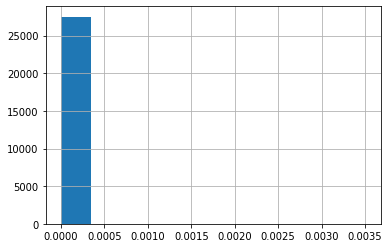

In [68]:
df.loc[df['Transportation Mode']=='walk']['velocity'].hist()

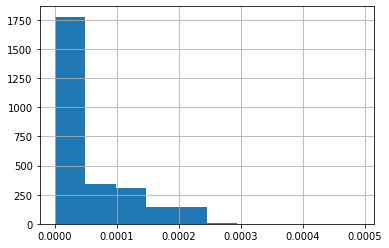

In [69]:
df.loc[df['Transportation Mode']=='taxi']['velocity'].hist()


### Displacement Lat Walking Versus Taxi

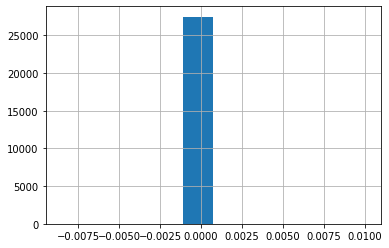

In [70]:
df.loc[df['Transportation Mode']=='walk']['change_lat'].hist()

In [ ]:
df.loc[df['Transportation Mode']=='taxi']['change_lat'].hist()

### Displacement Lon Walking Versus Taxi

In [ ]:
df.loc[df['Transportation Mode']=='walk']['change_long'].hist()


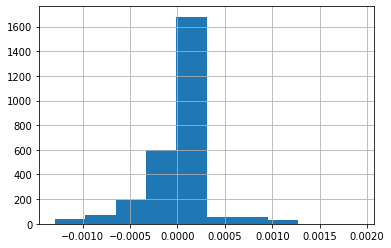

In [71]:
df.loc[df['Transportation Mode']=='taxi']['change_long'].hist()

### Distance Walking Vs Taxi

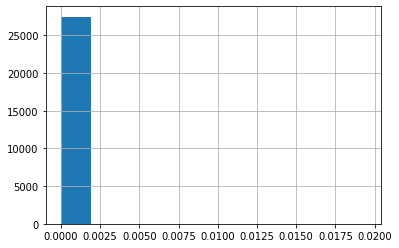

In [72]:
df.loc[df['Transportation Mode']=='walk']['dist'].hist()

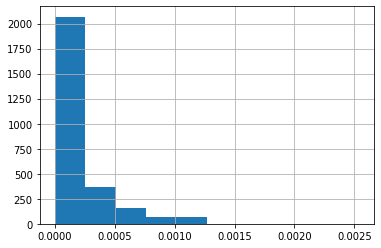

In [73]:
df.loc[df['Transportation Mode']=='taxi']['dist'].hist()

## Machine Learning
---



### Random Forest 


In [74]:
kfold = KFold(n_splits=10, shuffle=True, random_state=20)


In [75]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Transportation Mode']]).toarray())
encoder_df.columns = ['subway', 'taxi', 'walk']
#df.drop(['subway','taxi','walk'],inplace=True, axis=1)
df  = df.join(encoder_df)
df = df.drop_duplicates()
df

,Transportation Mode,timestep,dist,bearing,velocity,start_lat,end_lat,start_long,end_long,run_number,change_lat,change_long,subway,taxi,walk
0,walk,2.0,0.000090,-90.414846,4.478884e-05,39.974819,39.974819,116.311516,116.311426,1,4.970605e-07,0.000090,0.0,0.0,1.0
1,walk,2.0,0.000178,-89.530853,8.898522e-05,39.974819,39.974820,116.311426,116.311249,1,-1.116597e-06,0.000178,0.0,0.0,1.0
2,walk,2.0,0.000188,-88.008234,9.409083e-05,39.974820,39.974825,116.311249,116.311060,1,-5.013195e-06,0.000188,0.0,0.0,1.0
3,walk,2.0,0.000184,-89.870698,9.216705e-05,39.974825,39.974825,116.311060,116.310876,1,-3.186416e-07,0.000184,0.0,0.0,1.0
4,walk,2.0,0.000193,-94.398039,9.634225e-05,39.974825,39.974814,116.310876,116.310684,1,1.133717e-05,0.000192,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30341,walk,5.0,0.000043,-127.031344,8.514251e-06,39.947633,39.947612,116.410774,116.410737,130,2.131343e-05,0.000037,0.0,0.0,1.0
30342,walk,5.0,0.000036,-130.210432,7.199553e-06,39.947612,39.947592,116.410737,116.410707,130,1.957786e-05,0.000030,0.0,0.0,1.0
30343,walk,5.0,0.000019,-155.161449,3.760667e-06,39.947592,39.947576,116.410707,116.410697,130,1.609678e-05,0.000010,0.0,0.0,1.0
30344,walk,3.0,0.000003,-76.098681,8.802890e-07,39.947576,39.947577,116.410697,116.410694,130,-4.922974e-07,0.000003,0.0,0.0,1.0


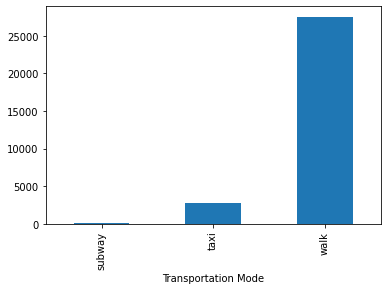

In [77]:
df.groupby('Transportation Mode')['walk'].count().plot(kind='bar')

In [78]:
target_encoder = LabelEncoder()
y_df = pd.DataFrame(target_encoder.fit_transform(df['Transportation Mode']))


In [79]:
x_df= df[['timestep','dist', 'bearing','velocity','change_long','change_lat']]

X= x_df.to_numpy()
y = y_df[0].to_numpy()


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(15173, 6) (15173, 6) (15173,) (15173,)


In [81]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
acc = accuracy_score(y_test, yhat)


In [82]:
cm = multilabel_confusion_matrix(y_test, yhat, labels=[0,1,2] )
cm

array([[[15119,     4],
        [   50,     0]],

       [[13620,   165],
        [  963,   425]],

       [[  428,  1010],
        [  166, 13569]]])

#### Accuracy

In [ ]:
#kfold = KFold(n_splits=10, shuffle=True, random_state=20)

for i, col in enumerate(encoder_df.columns):

    conf_df = pd.DataFrame(cm[i],columns=['Positive','Negative'], index=['Positive','Negatives'])
    fig = px.imshow(conf_df, text_auto=True,title=str(col))
    fig.show()



#### Cross Validation

In [ ]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

results = cross_val_score(model, X, y, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print(pd.DataFrame({'Feature Importance':model.feature_importances_
                    }))

print(f1_score(y_test, yhat, average='micro'))

### XGBoost

I will write a blurb later on why I chose this and why this works.

#### Accuracy

In [ ]:
clf = xgb.XGBClassifier(scale_pos_weight=99)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
acc = accuracy_score(y_test, yhat)

cm = multilabel_confusion_matrix(y_test, yhat, labels=[0,1,2] )

for i, col in enumerate(encoder_df.columns):

    conf_df = pd.DataFrame(cm[i],columns=['Positive','Negative'], index=['Positive','Negatives'])
    fig = px.imshow(conf_df, text_auto=True,title=str(col))
    fig.show()

print(f1_score(y_test, yhat,average='micro'))

#### Cross Validation

In [83]:
clf = xgb.XGBClassifier()

clf.fit(X, y)



XGBClassifier(objective='multi:softprob')

In [84]:
results = cross_val_score(clf, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print(pd.DataFrame({'Feature Importance':clf.feature_importances_
                    }))


Accuracy: 92.71% (0.44%)
   Feature Importance
0            0.120964
1            0.149499
2            0.068678
3            0.423404
4            0.079797
5            0.157658


## Machine Learning Results

In [85]:
clf = xgb.XGBClassifier()

clf.fit(X_train, y_train)
yhat = clf.predict(X_test)


In [86]:
traj_df['Unnamed: 0'] = 0
geolife_df = transform_geo_life_df(traj_df)
geolife_df['change_long'] = geolife_df['end_long'] - geolife_df['start_long']

In [87]:
geolife_df['change_lat'] = geolife_df['start_lat'] - geolife_df['end_lat']
geolife_df['change_long'] = geolife_df['start_long'] - geolife_df['end_long']

X = geolife_df[['timestep','dist', 'bearing','velocity','change_lat','change_long']].to_numpy()

yhat = clf.predict(X)


In [119]:
input = geolife_df[['start_datetime','timestep','dist', 'bearing','velocity',
                    'change_lat','change_long', 'start_lat','end_lat','start_long',
                    'end_long', 'start_point_geom','Transportation Mode']]

input.reset_index(drop=True, inplace=True)
input

,start_datetime,timestep,dist,bearing,velocity,change_lat,change_long,start_lat,end_lat,start_long,end_long,start_point_geom,Transportation Mode
0,2008-05-20 12:25:00,2.0,0.000090,-90.414846,0.000045,4.970605e-07,8.957631e-05,39.974819,39.974819,116.311516,116.311426,POINT (116.31152 39.97482),walk
1,2008-05-20 12:25:02,2.0,0.000178,-89.530853,0.000089,-1.116597e-06,1.779669e-04,39.974819,39.974820,116.311426,116.311249,POINT (116.31143 39.97482),walk
2,2008-05-20 12:25:04,2.0,0.000188,-88.008234,0.000094,-5.013195e-06,1.881149e-04,39.974820,39.974825,116.311249,116.311060,POINT (116.31125 39.97482),walk
3,2008-05-20 12:25:06,2.0,0.000184,-89.870698,0.000092,-3.186416e-07,1.843338e-04,39.974825,39.974825,116.311060,116.310876,POINT (116.31106 39.97482),walk
4,2008-05-20 12:25:08,2.0,0.000193,-94.398039,0.000096,1.133717e-05,1.923507e-04,39.974825,39.974814,116.310876,116.310684,POINT (116.31088 39.97483),walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2008-05-20 14:22:48,2.0,0.000025,122.889251,0.000013,1.116740e-05,-2.253841e-05,39.984782,39.984771,116.352928,116.352950,POINT (116.35293 39.98478),taxi
724,2008-05-20 14:22:50,2.0,0.000024,132.299250,0.000012,1.377784e-05,-1.976212e-05,39.984771,39.984758,116.352950,116.352970,POINT (116.35295 39.98477),taxi
725,2008-05-20 14:22:52,2.0,0.000023,139.106315,0.000012,1.555807e-05,-1.758489e-05,39.984758,39.984742,116.352970,116.352988,POINT (116.35297 39.98476),taxi
726,2008-05-20 14:22:54,2.0,0.000017,150.583723,0.000009,1.398694e-05,-1.029276e-05,39.984742,39.984728,116.352988,116.352998,POINT (116.35299 39.98474),taxi


In [120]:
target = pd.DataFrame({'target': yhat})
target


,target
0,2
1,1
2,1
3,1
4,1
...,...
723,2
724,2
725,2
726,2


In [121]:
df = pd.concat([input, target], axis=1)
df

,start_datetime,timestep,dist,bearing,velocity,change_lat,change_long,start_lat,end_lat,start_long,end_long,start_point_geom,Transportation Mode,target
0,2008-05-20 12:25:00,2.0,0.000090,-90.414846,0.000045,4.970605e-07,8.957631e-05,39.974819,39.974819,116.311516,116.311426,POINT (116.31152 39.97482),walk,2
1,2008-05-20 12:25:02,2.0,0.000178,-89.530853,0.000089,-1.116597e-06,1.779669e-04,39.974819,39.974820,116.311426,116.311249,POINT (116.31143 39.97482),walk,1
2,2008-05-20 12:25:04,2.0,0.000188,-88.008234,0.000094,-5.013195e-06,1.881149e-04,39.974820,39.974825,116.311249,116.311060,POINT (116.31125 39.97482),walk,1
3,2008-05-20 12:25:06,2.0,0.000184,-89.870698,0.000092,-3.186416e-07,1.843338e-04,39.974825,39.974825,116.311060,116.310876,POINT (116.31106 39.97482),walk,1
4,2008-05-20 12:25:08,2.0,0.000193,-94.398039,0.000096,1.133717e-05,1.923507e-04,39.974825,39.974814,116.310876,116.310684,POINT (116.31088 39.97483),walk,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2008-05-20 14:22:48,2.0,0.000025,122.889251,0.000013,1.116740e-05,-2.253841e-05,39.984782,39.984771,116.352928,116.352950,POINT (116.35293 39.98478),taxi,2
724,2008-05-20 14:22:50,2.0,0.000024,132.299250,0.000012,1.377784e-05,-1.976212e-05,39.984771,39.984758,116.352950,116.352970,POINT (116.35295 39.98477),taxi,2
725,2008-05-20 14:22:52,2.0,0.000023,139.106315,0.000012,1.555807e-05,-1.758489e-05,39.984758,39.984742,116.352970,116.352988,POINT (116.35297 39.98476),taxi,2
726,2008-05-20 14:22:54,2.0,0.000017,150.583723,0.000009,1.398694e-05,-1.029276e-05,39.984742,39.984728,116.352988,116.352998,POINT (116.35299 39.98474),taxi,2


In [122]:
def get_points(df, tol):
    point_list = []
    for p in LineString(df['start_point_geom']).simplify(tol).coords:
        point_list.append(Point(p).wkt)
    return point_list

def create_rdp_df(df):
    df.reset_index(drop=True, inplace=True)
    hash_map = {1: 0.0001, 2: 0.0001, 3: 0.01}
    if len(df) >1:
        val = df[['target']].iloc[0]['target']
        if val == 1:
            rdp_df = pd.DataFrame({'start_point_geom':get_points(df, 0.00032)})

        elif val== 2:
            rdp_df = pd.DataFrame({'start_point_geom' : get_points(df, 0.0000159)})

        elif val== 3:
            rdp_df = pd.DataFrame({'start_point_geom' : get_points(df, 0.0000111)})
    
        df['start_point_geom'] = df['start_point_geom'].astype(str)
        return df.merge(rdp_df, on='start_point_geom', how='inner')
    else:
        return df

    #df['target'] = df['target'].apply(lambda x:hash_map[x] )




In [123]:
df_list = []
for k, v  in df[df['target'] == 1].groupby((df['target'] != 1).cumsum()):
    
    rdp = create_rdp_df(v)
    df_list.append(v)

simp_df = pd.concat(df_list,ignore_index=True)
simp_df

,start_datetime,timestep,dist,bearing,velocity,change_lat,change_long,start_lat,end_lat,start_long,end_long,start_point_geom,Transportation Mode,target
0,2008-05-20 12:25:02,2.0,0.000178,-89.530853,0.000089,-1.116597e-06,0.000178,39.974819,39.974820,116.311426,116.311249,POINT (116.31142648175475 39.97481883768462),walk,1
1,2008-05-20 12:25:04,2.0,0.000188,-88.008234,0.000094,-5.013195e-06,0.000188,39.974820,39.974825,116.311249,116.311060,POINT (116.31124851482721 39.9748199542813),walk,1
2,2008-05-20 12:25:06,2.0,0.000184,-89.870698,0.000092,-3.186416e-07,0.000184,39.974825,39.974825,116.311060,116.310876,POINT (116.31106039995397 39.9748249674767),walk,1
3,2008-05-20 12:25:08,2.0,0.000193,-94.398039,0.000096,1.133717e-05,0.000192,39.974825,39.974814,116.310876,116.310684,POINT (116.31087606613595 39.97482528611827),walk,1
4,2008-05-20 12:25:10,2.0,0.000209,-97.262015,0.000104,2.030787e-05,0.000208,39.974814,39.974794,116.310684,116.310476,POINT (116.31068371544755 39.97481394895145),walk,1
5,2008-05-20 12:25:12,2.0,0.000220,-96.850723,0.000110,2.016779e-05,0.000219,39.974794,39.974773,116.310476,116.310257,POINT (116.31047575664824 39.974793641084304),walk,1
6,2008-05-20 12:25:14,2.0,0.000225,-94.962403,0.000112,1.491246e-05,0.000224,39.974773,39.974759,116.310257,116.310033,POINT (116.31025670363921 39.9747734732926),walk,1
7,2008-05-20 12:25:16,2.0,0.000224,-94.308869,0.000112,1.290690e-05,0.000224,39.974759,39.974746,116.310033,116.309809,POINT (116.3100325884283 39.97475856083377),walk,1
8,2008-05-20 12:25:18,2.0,0.000217,-95.386382,0.000108,1.560797e-05,0.000216,39.974746,39.974730,116.309809,116.309593,POINT (116.30980905647887 39.97474565393667),walk,1
9,2008-05-20 12:25:20,2.0,0.000208,-96.511015,0.000104,1.808985e-05,0.000207,39.974730,39.974712,116.309593,116.309386,POINT (116.30959304864379 39.97473004597118),walk,1


## Final Plot

In [124]:
tdf = skmob.TrajDataFrame(simp_df, latitude='start_lat',longitude='start_long', datetime = 'start_datetime')
tdf.plot_trajectory(zoom=12, weight=1, opacity=0.9)


/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning:

If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.



## Data Reduction Amount

In [125]:
data_reduction = (1-(len(simp_df)/len(df)))*100
print("Reduced the data by {0}%.".format((data_reduction)))

Reduced the data by 97.66483516483517%.




# To Be Continued

- Looking at State Space Models to reduce error first then applyging the RDP to reduce data. 
- Breaking down different kinds of clusters, for different types of behaviors with semi-unsupervised clustering algorithms.

# Citations:

- https://arxiv.org/abs/1704.05964
- https://dalspace.library.dal.ca/bitstream/handle/10222/79941/Etemad-Mohammad-PHD-ComputerScience-Sep-2020.pdf?sequence=1
- https://movementecologyjournal.biomedcentral.com/articles/10.1186/s40462-016-0086-5
- https://www.microsoft.com/en-us/research/publication/tutorial-on-location-based-social-networks/
- https://asset-pdf.scinapse.io/prod/1626398438/1626398438.pdf
- https://link.springer.com/article/10.1007/s41060-016-0014-1
- http://kth.diva-portal.org/smash/get/diva2:1376904/FULLTEXT01.pdf
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5876950/
- https://josis.org/index.php/josis/article/view/46/46
- https://www.sciencedirect.com/science/article/abs/pii/S0021929004002258?via%3Dihub

# Data Citations

- https://github.com/jbremz/Beijing-Trajectories-Project/tree/master/Example%20Data/028/Trajectory
- https://github.com/jmharkins/trajectory-data
- https://github.com/jbremz/Beijing-Trajectories-Project/blob/master/Classification/Classification%20Notes.ipynb

# For a Rainy Day
Equations:

$z = \frac {x-\overline{x}}{σ}$

$y[i] = \sum_{k=1}^i x[k], \text{ for } i=1, 2, \dots, N$ where the index n is where $|z|> 1$